In [ ]:
pip install pysus

In [10]:
from pysus.online_data import SINAN
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Chagas',
 'Colera',
 'Coqueluche',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica']

In [7]:
SINAN.get_available_years('SP', 'Malaria')

['MALASP07.dbc',
 'MALASP08.dbc',
 'MALASP09.dbc',
 'MALASP10.dbc',
 'MALASP11.dbc',
 'MALASP12.dbc',
 'MALASP13.dbc',
 'MALASP14.dbc',
 'MALASP15.dbc',
 'MALASP16.dbc',
 'MALASP17.dbc']

In [8]:
df = SINAN.download('SP',2017,'Malaria')
df.head()

/usr/local/lib/python3.7/dist-packages/pysus/online_data/SINAN.py:89: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  df.to_parquet(cachefile)


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,CLASSI_FIN,AT_ATIVIDA,AT_LAMINA,AT_SINTOMA,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,LOC_INF,DEXAME,RESULT,PMM,PCRUZ,TRA_ESQUEM,DSTRAESQUE,DTRATA,DT_ENCERRA
0,2,B54,2017-01-04,201701,2017,35,355580,1574,2073250,2016-12-28,201652,1974-12-22,4042,M,6,1,05,35,355580,1574,1,None,782505,1,10,1,1,2,AM,1,130170,,2017-01-04,4,NaN,3,1,,2017-01-04,None
1,2,B54,2017-01-05,201701,2017,35,354980,1354,2077396,2017-01-01,201701,1985-09-09,4031,M,6,1,03,35,353280,1354,1,None,,2,4,2,1,,,0,,,2017-01-05,1,NaN,,,,None,None
2,2,B54,2017-01-10,201702,2017,35,354140,1346,2755130,2016-10-10,201641,1977-11-25,4038,F,5,2,06,35,354140,1346,1,None,,2,3,1,1,,,0,,,2017-01-10,1,NaN,,,,None,None
3,2,B54,2017-01-10,201702,2017,35,351550,1574,2076047,2017-01-01,201701,1990-05-03,4026,F,5,1,04,35,351550,1574,1,None,632205,2,1,1,2,,,0,,,2017-01-10,1,NaN,,,,None,None
4,2,B54,2017-01-11,201702,2017,35,355030,1331,2077477,2017-01-06,201701,2004-06-14,4012,M,6,2,09,35,355030,1331,1,None,,2,99,1,1,,,0,,,2017-01-11,1,NaN,,,,None,None


In [12]:
for columns in df.columns:
    if columns.startswith("DT_"):
        df[columns] = df[columns].astype('datetime64[ns]')
    elif columns == 'NU_ANO':
        df[columns] = df[columns].astype(int)
    elif columns == 'RESUL_HIS':
        df[columns] = df[columns].astype(str)
    else:
        try:
            df[columns] = df[columns].astype(int)
        except:
            try:
                df[columns] = df[columns].astype(float)
            except:
                df[columns] = df[columns].astype(str)

In [13]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TP_NOT      217 non-null    int64         
 1   ID_AGRAVO   217 non-null    object        
 2   DT_NOTIFIC  217 non-null    datetime64[ns]
 3   SEM_NOT     217 non-null    int64         
 4   NU_ANO      217 non-null    int64         
 5   SG_UF_NOT   217 non-null    int64         
 6   ID_MUNICIP  217 non-null    int64         
 7   ID_REGIONA  217 non-null    object        
 8   ID_UNIDADE  217 non-null    int64         
 9   DT_SIN_PRI  217 non-null    datetime64[ns]
 10  SEM_PRI     217 non-null    int64         
 11  DT_NASC     215 non-null    datetime64[ns]
 12  NU_IDADE_N  217 non-null    int64         
 13  CS_SEXO     217 non-null    object        
 14  CS_GESTANT  217 non-null    int64         
 15  CS_RACA     217 non-null    object        
 16  CS_ESCOL_N  217 no

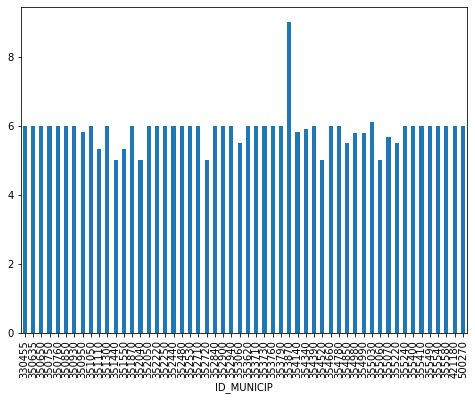

In [17]:
fig, ax = plt.subplots(1, 1)
df2 = df.groupby('ID_MUNICIP').mean()
df2['CS_GESTANT'].plot(kind = 'bar', figsize=(8,6))